<a href="https://colab.research.google.com/github/hrbolek/coronavirus/blob/master/czech_open_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import json
import requests
import pandas as pd
import numpy as np

plt.rcParams["figure.figsize"] = (15,10)

In [0]:
urlHlaseni = 'https://onemocneni-aktualne.mzcr.cz/api/v1/covid-19/osoby.json'
responseHlaseni = requests.request("GET", urlHlaseni)
urlCumulative = 'https://onemocneni-aktualne.mzcr.cz/api/v1/covid-19/nakaza.json'
responseCumulative = requests.request("GET", urlCumulative)
urlTesty = 'https://onemocneni-aktualne.mzcr.cz/api/v1/covid-19/testy.json'
responseTesty = requests.request("GET", urlTesty)

In [0]:
from functools import reduce
def countFromStr(series):
  numbers = series.astype(float).tolist()
  return reduce(lambda x, y: x + 1, numbers)

# Vývoj počtu nově nakažených

In [0]:
dataHlaseni = responseHlaseni.json()
dataCumulative = responseCumulative.json()
dataTesty = responseTesty.json()

In [0]:
#df = pd.DataFrame(data)
#display(df)
#df.groupby(['KHS']).count()
#display(df.groupby(['KHS']).count())
#df.pivot_table(values='Import', index=['Pohlavi', 'KHS'], columns=['ImportZemeCsuKod'], aggfunc=sumFromStr)
#df.pivot_table(values='Import', index=['DatumHlaseni'], columns=['KHS'], aggfunc=sumFromStr)

#df.groupby(['DatumHlaseni','Pohlavi']).size().unstack().plot(kind='bar',stacked=True)
#plt.grid(which='both')
#plt.show()

# Celkový vývoj počtu nakažených

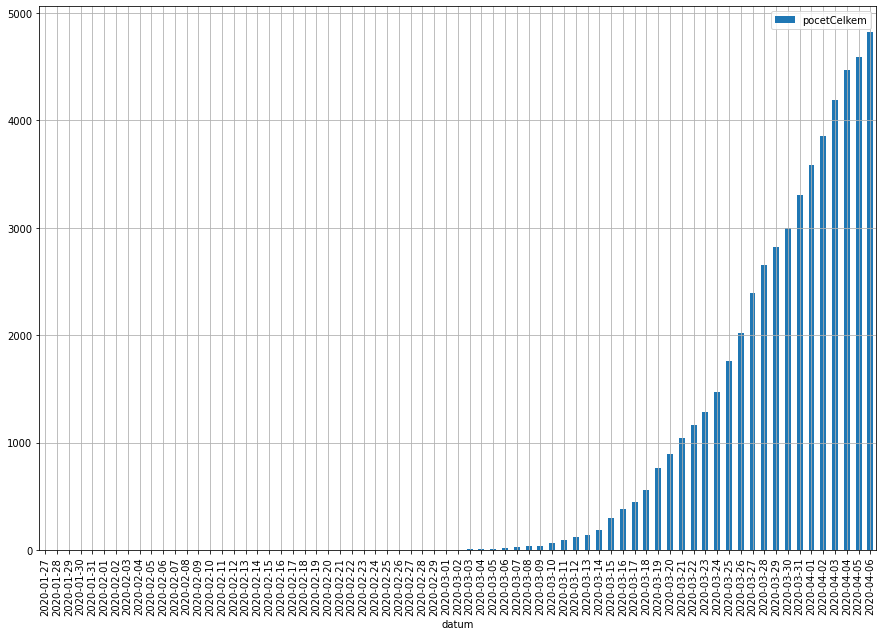

In [63]:
dfCumulative = pd.DataFrame(dataCumulative)
dfHlaseni = pd.DataFrame(dataHlaseni)
dfCumulative.plot(kind='bar',x='datum',y='pocetCelkem')
#dfCumulative.plot(kind='bar',x='datum',y='pocetDen')
plt.grid(which='both')
plt.show()

# Denní přírůstek počtu nakažených

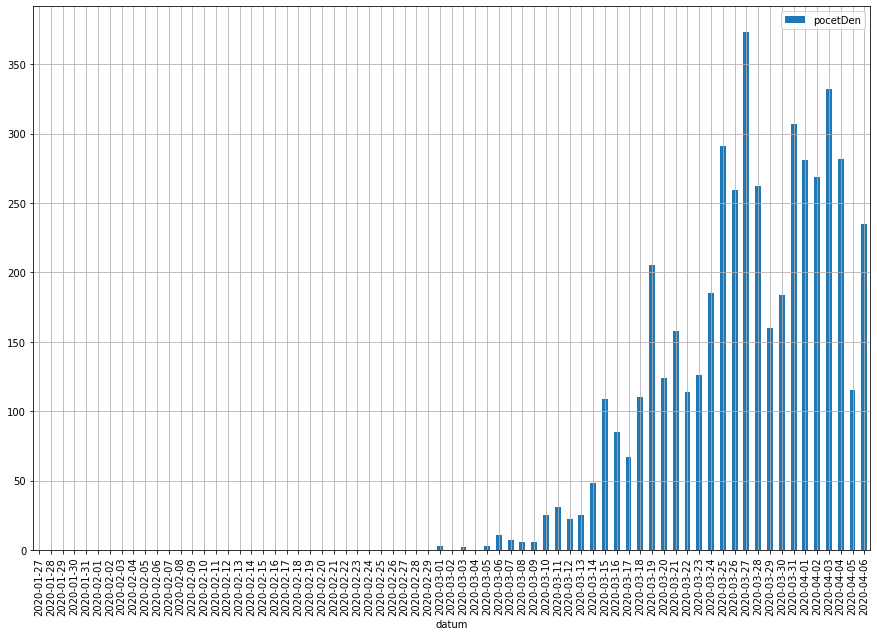

In [65]:
dfCumulative.plot(kind='bar',x='datum',y='pocetDen')
plt.grid(which='both')
plt.show()

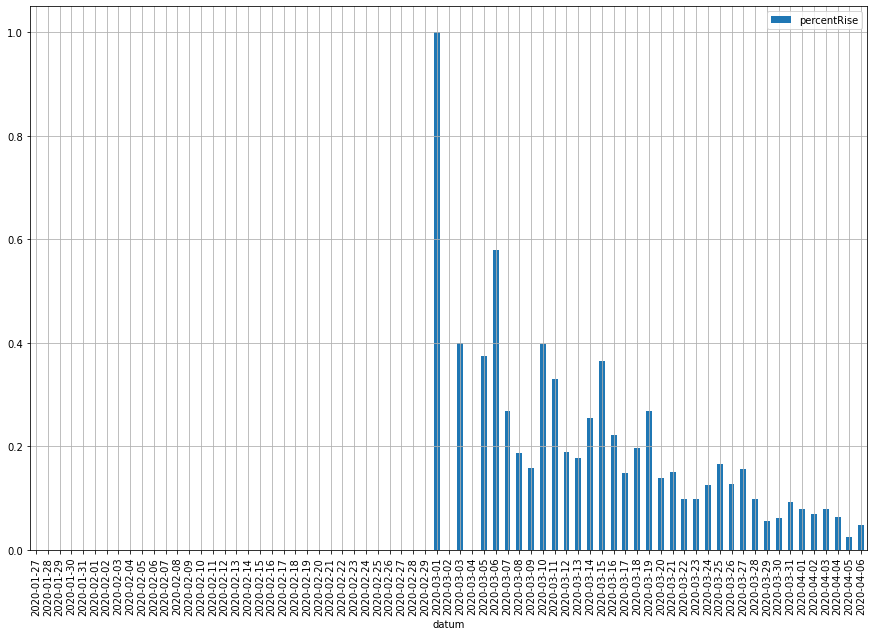

In [67]:
dfCumulative['percentRise'] = dfCumulative.pocetDen /dfCumulative.pocetCelkem
dfCumulative.plot(kind='bar',x='datum',y='percentRise')
plt.grid(which='both')
plt.show()

# Celkový vývoj počtu nakažených

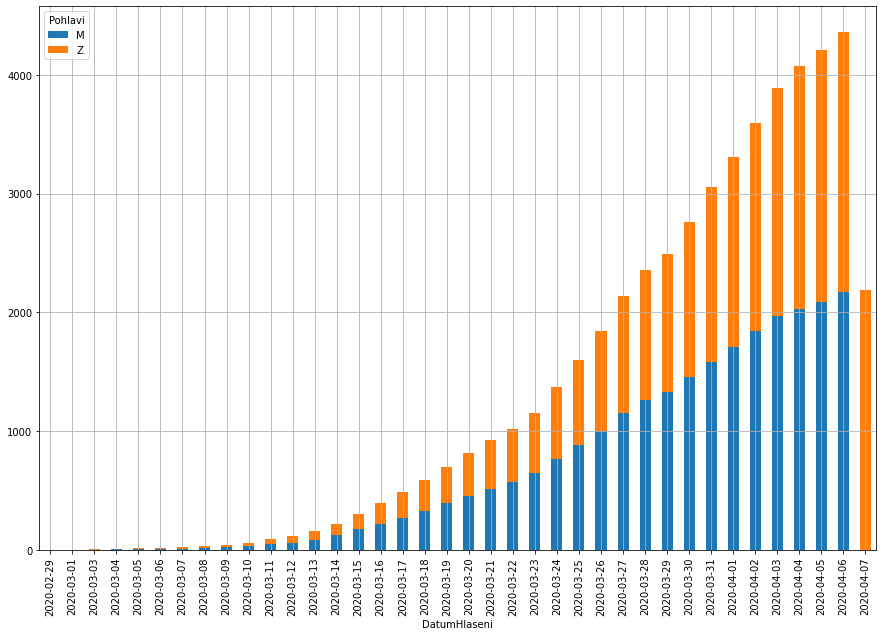

In [64]:
dfHlaseni.groupby(['DatumHlaseni','Pohlavi']).size().groupby('Pohlavi').cumsum().unstack().plot(kind='bar',stacked=True)
plt.grid(which='both')
plt.show()